In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime

from sklearn.model_selection import train_test_split

In [44]:
train_fm = pd.read_csv('data/train_prep.csv')
test_fm = pd.read_csv('data/test_prep.csv')

In [45]:
train_fm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341880 entries, 0 to 341879
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   temp      341880 non-null  float64
 1   d_point   341880 non-null  float64
 2   feels     341880 non-null  float64
 3   min_temp  341880 non-null  float64
 4   max_temp  341880 non-null  float64
 5   prssr     341880 non-null  float64
 6   hum       341880 non-null  float64
 7   wind_spd  341880 non-null  float64
 8   wind_deg  341880 non-null  float64
 9   clouds    341880 non-null  float64
 10  rain_1h   341880 non-null  float64
dtypes: float64(11)
memory usage: 28.7 MB


In [72]:
train_fm.head()

,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,clouds,rain_1h
0,24.75,23.89,25.76,24.28,25.22,1012.0,95.0,0.82,320.0,100.0,0.401359
1,24.58,23.73,25.57,23.99,25.26,1012.0,95.0,0.96,338.0,100.0,0.000000
2,26.60,24.06,26.60,26.10,27.39,1012.0,86.0,1.22,339.0,99.0,0.000000
3,27.31,24.37,30.90,26.59,28.36,1012.0,84.0,1.08,342.0,94.0,0.130000
4,27.41,25.05,31.54,26.58,28.31,1011.0,87.0,0.86,336.0,100.0,0.340000


In [92]:
train_med = pd.read_csv('data/train_med.csv')
train_mean_filterd = pd.read_csv('data/train_med_filtered.csv')

In [13]:
train_final = train_fm.dropna()

In [96]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
train_scaled = scaler.fit_transform(train_mean_filterd)
scaled_df = pd.DataFrame(train_scaled, columns=train_final.columns)
scaled_df.head()

,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,rain_1h,clouds
0,0.444144,0.435484,0.430563,0.514308,0.465950,0.750,0.555556,0.411538,0.723320,0.055556,0.787797
1,0.453153,0.572581,0.466258,0.513514,0.461470,0.625,0.638889,0.326923,0.710630,0.444444,1.000000
2,0.360360,0.556452,0.178472,0.441971,0.525090,0.375,0.777778,0.165385,0.621801,0.537037,0.787797
3,0.273874,0.578629,0.189626,0.368839,0.256272,0.375,0.944444,0.238462,0.076139,0.203704,0.787797
4,0.253153,0.566532,0.176799,0.348172,0.225806,0.500,0.972222,0.296154,0.021150,0.203704,0.000000


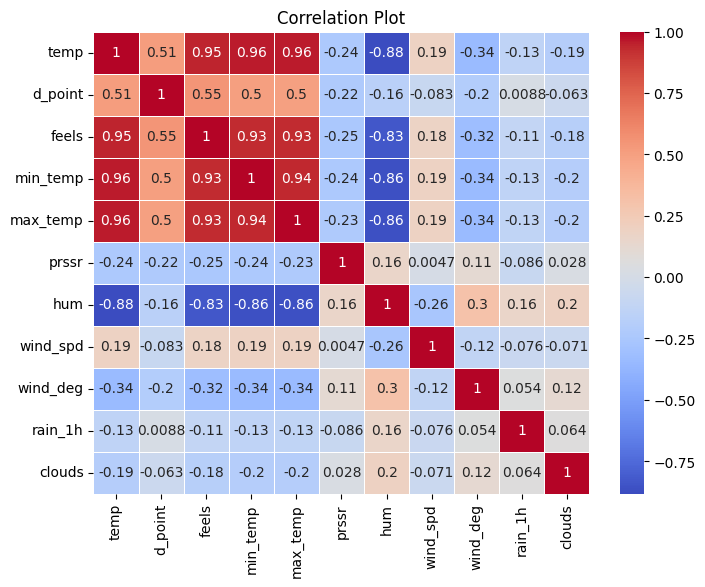

In [97]:
# Calculate the correlation matrix
correlation_matrix = scaled_df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

In [58]:
def plotDistribution(dataset, feature_name):
    plt.rcParams['figure.figsize'] = (15, 5)
    sns.histplot(dataset[feature_name], kde=True, color='blue', bins=30)
    plt.title(f'{feature_name} Distribution', family='Arial', fontsize=16)
    plt.xlabel(feature_name, family='Arial', fontsize=14)
    plt.ylabel('Frequency', family='Arial', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.tight_layout()
    plt.show()

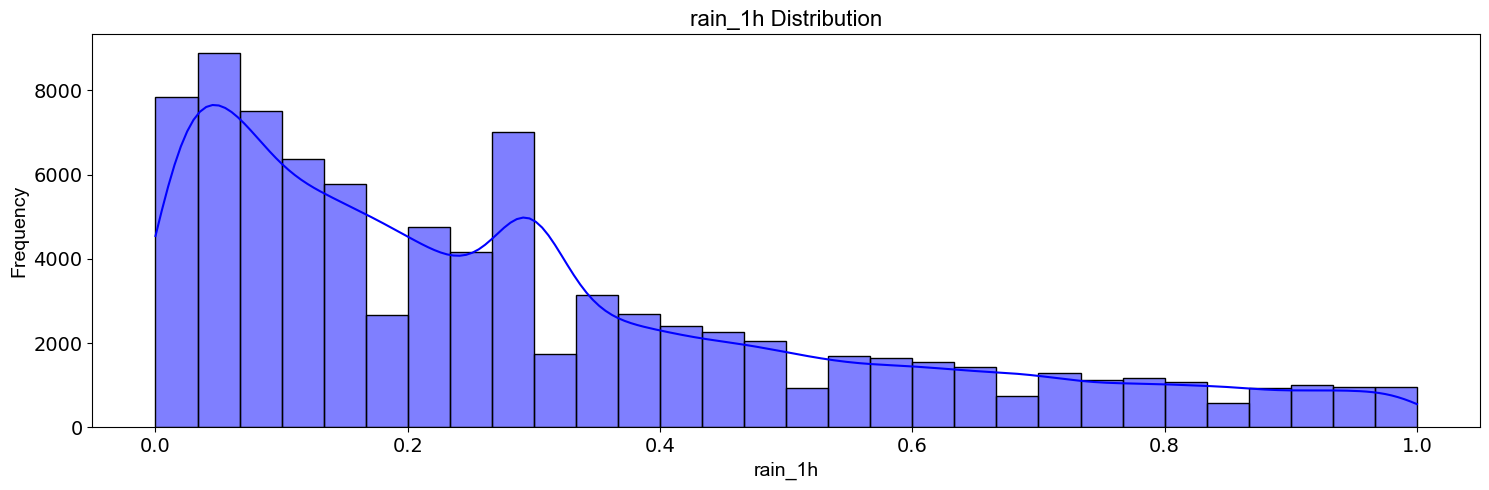

In [98]:
plotDistribution(scaled_df, 'rain_1h')

In [99]:
# selected_X = scaled_df[['feels', 'clouds', 'prssr']]
X = scaled_df.drop('rain_1h', axis = 1)
y = scaled_df['rain_1h']

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [101]:
X_train.columns

Index(['temp', 'd_point', 'feels', 'min_temp', 'max_temp', 'prssr', 'hum',
       'wind_spd', 'wind_deg', 'clouds'],
      dtype='object')

In [107]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=0, max_features =None)

# Fit the model to the data
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

In [108]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE: ", rmse)

RMSE:  0.2556581966472705


# Test

In [109]:
test_fm.isna().sum()

datetime_iso    0
temp            0
d_point         0
feels           0
min_temp        0
max_temp        0
prssr           0
hum             0
wind_spd        0
wind_deg        0
clouds          0
dtype: int64

In [110]:
test_scaled = scaler.fit_transform(test_fm.drop('datetime_iso', axis = 1))
scaled_df_test = pd.DataFrame(test_scaled, columns=test_fm.drop('datetime_iso', axis = 1).columns)
scaled_df_test.head()

,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,clouds
0,0.352041,0.231579,0.181513,0.465008,0.330537,0.375,0.567568,0.473856,0.986111,0.94
1,0.345238,0.496842,0.177031,0.468118,0.404362,0.375,0.756757,0.545752,0.975000,0.90
2,0.529762,0.663158,0.634734,0.621306,0.510067,0.375,0.567568,0.562092,0.958333,0.80
3,0.543367,0.566316,0.625210,0.659409,0.491611,0.250,0.486486,0.486928,0.941667,0.82
4,0.620748,0.433684,0.673950,0.720840,0.616611,0.125,0.297297,0.454248,0.941667,0.92


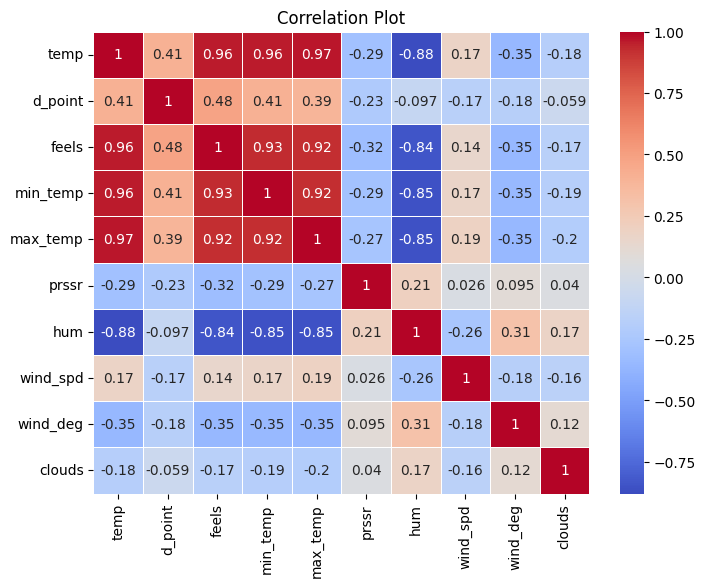

In [111]:
# Calculate the correlation matrix
correlation_matrix = scaled_df_test.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

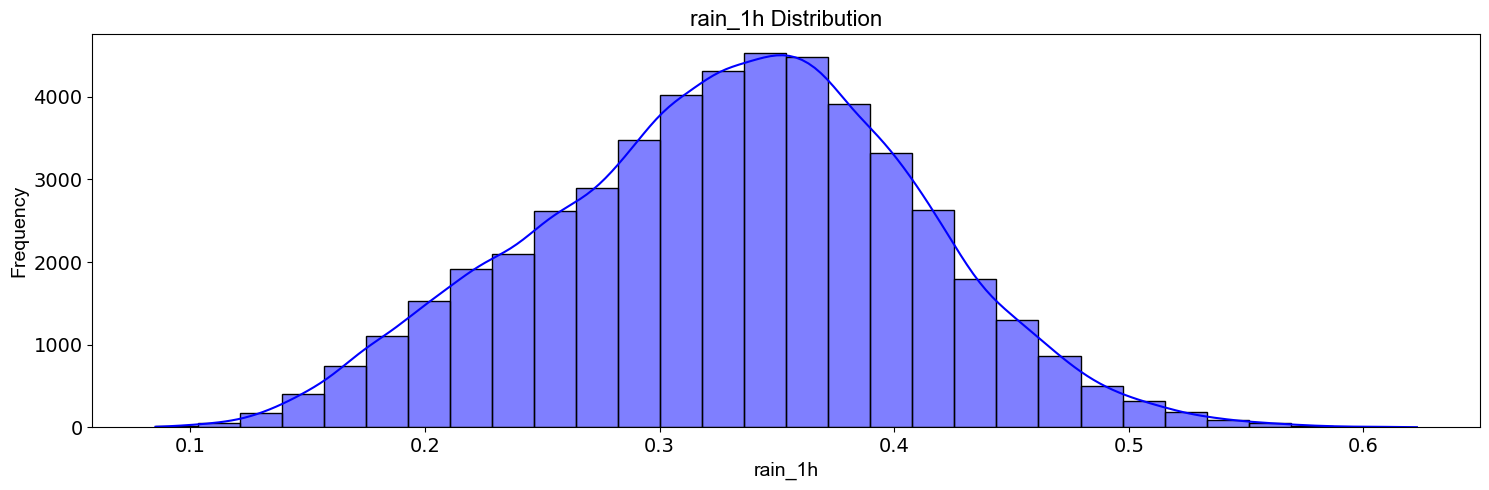

In [114]:
plotDistribution(submission, 'rain_1h')

In [112]:
predictions = rf_model.predict(scaled_df_test)

print(predictions)

[0.28942897 0.41311719 0.33719127 ... 0.30461415 0.30461415 0.24333333]


In [113]:
submission = pd.DataFrame({
    'datetime_iso': test_fm['datetime_iso'],
    'rain_1h': predictions
})

submission.to_csv('data/sample_submission.csv', index=False)

In [58]:
# test_selected_column = test[['datetime_iso','temp','d_point','feels','min_temp','max_temp','prssr','hum','wind_spd','wind_deg','clouds']]
# test_selected_column.head(5)

,datetime_iso,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,clouds
0,2018-01-01 00:00:00+00:00,26.59,23.66,26.59,26.02,27.16,1009.0,84.0,1.45,355.0,97.0
1,2018-01-01 01:00:00+00:00,26.51,24.92,26.51,26.06,28.04,1009.0,91.0,1.67,351.0,95.0
2,2018-01-01 02:00:00+00:00,28.68,25.71,34.68,28.03,29.30,1009.0,84.0,1.72,345.0,90.0
3,2018-01-01 03:00:00+00:00,28.84,25.25,34.51,28.52,29.08,1008.0,81.0,1.49,339.0,91.0
4,2018-01-01 04:00:00+00:00,29.75,24.62,35.38,29.31,30.57,1007.0,74.0,1.39,339.0,96.0


In [53]:
# test_selected_column['temp'] = test_selected_column['temp'].apply(lambda x: extract_string(x))
# test_selected_column['min_temp'] = test_selected_column['min_temp'].apply(lambda x: extract_string(x))
# test_selected_column['max_temp'] = test_selected_column['max_temp'].apply(lambda x: extract_string(x))
# test_selected_column['prssr'] = test_selected_column['prssr'].apply(lambda x: extract_string(x))
# test_selected_column['hum'] = test_selected_column['hum'].apply(lambda x: extract_string(x))
# test_selected_column['wind_spd'] = test_selected_column['wind_spd'].apply(lambda x: extract_string(x))
# test_selected_column['clouds'] = test_selected_column['clouds'].apply(lambda x: extract_string(x))
# test_selected_column['d_point'] = test_selected_column['d_point'].apply(lambda x: extract_string(x))
# test_selected_column['feels'] = test_selected_column['feels'].apply(lambda x: extract_string(x))
# test_selected_column['wind_deg'] = test_selected_column['wind_deg'].apply(lambda x: extract_string(x))


C:\Users\MSI GL65\AppData\Local\Temp\ipykernel_6032\3348821507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_selected_column['temp'] = test_selected_column['temp'].apply(lambda x: extract_string(x))
C:\Users\MSI GL65\AppData\Local\Temp\ipykernel_6032\3348821507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_selected_column['min_temp'] = test_selected_column['min_temp'].apply(lambda x: extract_string(x))
C:\Users\MSI GL65\AppData\Local\Temp\ipykernel_6032\3348821507.py:3: SettingWithCopy

In [59]:
# test_selected_column.head()

,datetime_iso,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,clouds
0,2018-01-01 00:00:00+00:00,26.59,23.66,26.59,26.02,27.16,1009.0,84.0,1.45,355.0,97.0
1,2018-01-01 01:00:00+00:00,26.51,24.92,26.51,26.06,28.04,1009.0,91.0,1.67,351.0,95.0
2,2018-01-01 02:00:00+00:00,28.68,25.71,34.68,28.03,29.30,1009.0,84.0,1.72,345.0,90.0
3,2018-01-01 03:00:00+00:00,28.84,25.25,34.51,28.52,29.08,1008.0,81.0,1.49,339.0,91.0
4,2018-01-01 04:00:00+00:00,29.75,24.62,35.38,29.31,30.57,1007.0,74.0,1.39,339.0,96.0


In [61]:
# test_selected_column['wind_cloud_interaction'] = test_selected_column['wind_spd'] * test_selected_column['clouds']
# test_selected_column['avg_temp'] = (test_selected_column['min_temp'] + test_selected_column['max_temp']) / 2
# test_selected_column.head()

C:\Users\MSI GL65\AppData\Local\Temp\ipykernel_6032\1734354441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_selected_column['wind_cloud_interaction'] = test_selected_column['wind_spd'] * test_selected_column['clouds']
C:\Users\MSI GL65\AppData\Local\Temp\ipykernel_6032\1734354441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_selected_column['avg_temp'] = (test_selected_column['min_temp'] + test_selected_column['max_temp']) / 2


,datetime_iso,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,clouds,wind_cloud_interaction,avg_temp
0,2018-01-01 00:00:00+00:00,26.59,23.66,26.59,26.02,27.16,1009.0,84.0,1.45,355.0,97.0,140.65,26.590
1,2018-01-01 01:00:00+00:00,26.51,24.92,26.51,26.06,28.04,1009.0,91.0,1.67,351.0,95.0,158.65,27.050
2,2018-01-01 02:00:00+00:00,28.68,25.71,34.68,28.03,29.30,1009.0,84.0,1.72,345.0,90.0,154.80,28.665
3,2018-01-01 03:00:00+00:00,28.84,25.25,34.51,28.52,29.08,1008.0,81.0,1.49,339.0,91.0,135.59,28.800
4,2018-01-01 04:00:00+00:00,29.75,24.62,35.38,29.31,30.57,1007.0,74.0,1.39,339.0,96.0,133.44,29.940


In [62]:
# test_selected_column.head()

,datetime_iso,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,clouds,wind_cloud_interaction,avg_temp
0,2018-01-01 00:00:00+00:00,26.59,23.66,26.59,26.02,27.16,1009.0,84.0,1.45,355.0,97.0,140.65,26.590
1,2018-01-01 01:00:00+00:00,26.51,24.92,26.51,26.06,28.04,1009.0,91.0,1.67,351.0,95.0,158.65,27.050
2,2018-01-01 02:00:00+00:00,28.68,25.71,34.68,28.03,29.30,1009.0,84.0,1.72,345.0,90.0,154.80,28.665
3,2018-01-01 03:00:00+00:00,28.84,25.25,34.51,28.52,29.08,1008.0,81.0,1.49,339.0,91.0,135.59,28.800
4,2018-01-01 04:00:00+00:00,29.75,24.62,35.38,29.31,30.57,1007.0,74.0,1.39,339.0,96.0,133.44,29.940


In [69]:
# X_test_sub = X_test_sub.fillna(X_test_sub.mean())
# X_test_sub.isna().sum()

temp                      0
d_point                   0
feels                     0
min_temp                  0
max_temp                  0
prssr                     0
hum                       0
wind_spd                  0
wind_deg                  0
clouds                    0
wind_cloud_interaction    0
avg_temp                  0
dtype: int64

In [72]:
# test_scaled = scaler.fit_transform(X_test_sub)
# scaled_df_test = pd.DataFrame(test_scaled, columns=X_test_sub.columns)
# scaled_df_test.head()

,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,clouds,wind_cloud_interaction,avg_temp
0,0.000415,0.453057,0.000325,0.000599,0.015764,0.992358,0.84,0.000145,0.986111,0.97,0.000141,0.000789
1,0.000407,0.590611,0.000317,0.000603,0.019285,0.992358,0.91,0.000167,0.975000,0.95,0.000159,0.000879
2,0.000624,0.676856,0.001135,0.000801,0.024327,0.992358,0.84,0.000172,0.958333,0.90,0.000155,0.001195
3,0.000641,0.626638,0.001118,0.000850,0.023447,0.991266,0.81,0.000149,0.941667,0.91,0.000136,0.001221
4,0.000732,0.557860,0.001205,0.000929,0.029408,0.990175,0.74,0.000139,0.941667,0.96,0.000133,0.001444
